In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import nltk
import statsmodels.api as sm

# for creating ridge plot
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm

from collections import Counter

import draft_prepare as prepare

pd.set_option('max_columns', 100)

mpl.style.use('seaborn')

In [2]:
pwd

'/Users/bfs7/codeup-data-science/song-lyrics-capstone/Drafts'

In [3]:
df = prepare.get_data('../songs_0526.csv')

Features added ******************


In [4]:
df = df.set_index('date')

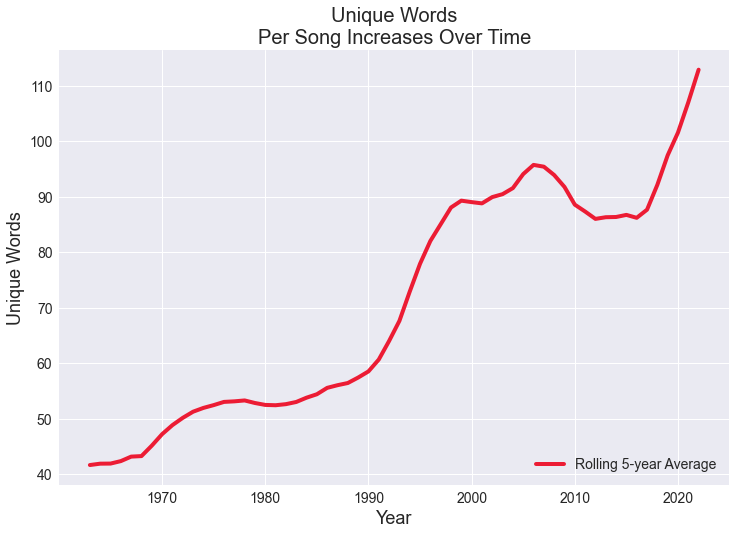

In [5]:
def unique_words_lineplot(df):
    df2 = df[['unique_words_count', 'word_count']].resample('Y').mean().dropna().rolling(5).mean()

    plt.figure(figsize=(12,8))
    sns.lineplot(data=df2, 
                 x='date', 
                 y='unique_words_count', 
                 color='#ec1c34', #(red)
                 linewidth=4)

    plt.title('Unique Words\nPer Song Increases Over Time', fontsize=20)
    plt.legend(['Rolling 5-year Average'], fontsize=14, loc='lower right')
    plt.xlabel('Year', fontsize=18)
    plt.xticks(fontsize=14)
    plt.ylabel('Unique Words', fontsize=18)
    plt.yticks(fontsize=14)
    plt.show()
    
unique_words_lineplot(df)

In [6]:
df

,title,artist,lyrics,raw_lyrics,decade,character_count,word_count,unique_words,unique_words_count,sentiment,sentiment_category,place_words,chorus_count,verse_count,verse_chorus_ratio,pre_chorus_count,outro_count,bridge_count,hook_count,bigrams,trigrams
date,,,,,,,,,,,,,,,,,,,,,
2001-10-20,#1,Nelly,uh uh uh got bring attention dirty better watc...,#1 LyricsUh uh uh I just gotta bring it to the...,2000,2014,363,til continue ask boat awake blindside humble t...,228,0.9915,very positive,[hook] [hook] [hook],0,0,0.000000,0,0,0,3,"[(uh, uh), (uh, uh), (uh, got), (got, bring), ...","[(uh, uh, uh), (uh, uh, got), (uh, got, bring)..."
1974-12-21,#9 Dream,John Lennon,long ago dream dream know yes know seemed real...,#9 Dream Lyrics[Verse 1] So long ago Was it in...,1970,842,135,warm took strange go could seemed dream say lo...,49,0.9169,very positive,[verse 1] [pre-chorus 1] [chorus] [verse 2] [p...,2,2,1.000000,2,1,0,0,"[(long, ago), (ago, dream), (dream, dream), (d...","[(long, ago, dream), (ago, dream, dream), (dre..."
2013-05-25,#Beautiful,Mariah Carey Featuring Miguel,ah ah beautiful ah ah beautiful hop back bike ...,"#Beautiful Lyrics[Intro: Mariah Carey] Ah, ah,...",2010,768,129,til oh make mind back red wind baby control ni...,54,0.9989,very positive,[intro: mariah carey] [verse 1: miguel] [choru...,2,2,1.000000,0,1,0,0,"[(ah, ah), (ah, beautiful), (beautiful, ah), (...","[(ah, ah, beautiful), (ah, beautiful, ah), (be..."
2014-03-15,#SELFIE,The Chainsmokers,jason table kept seeing look girl think make j...,#SELFIE Lyrics[Verse 1] When Jason was at the ...,2010,954,172,playing took oh u mind bought living need see ...,100,0.9218,very positive,[verse 1] [drop 1] [verse 2] [drop 2] [verse 3...,0,3,inf,0,0,0,0,"[(jason, table), (table, kept), (kept, seeing)...","[(jason, table, kept), (table, kept, seeing), ..."
2013-04-06,#thatPOWER,will.i.am Featuring Justin Bieber,oh alive alive alive oh fly fly fly oh alive a...,#thatPOWER Lyrics[Instrumental break] [Pre-Ch...,2010,1238,208,hustle oh batterram loving yyyyes cool momma l...,77,0.9984,very positive,[instrumental break] [pre-chorus: justin biebe...,3,2,0.666667,3,1,1,0,"[(oh, alive), (alive, alive), (alive, alive), ...","[(oh, alive, alive), (alive, alive, alive), (a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-03-28,Which Way You Goin' Billy?,The Poppy Family (Featuring Susan Jacks),way going billy go way going billy go really l...,Which Way You Goin’ Billy? LyricsWhich way you...,1970,535,98,really though ask last go would cry whole need...,36,0.8474,very positive,,0,0,0.000000,0,0,0,0,"[(way, going), (going, billy), (billy, go), (g...","[(way, going, billy), (going, billy, go), (bil..."
1960-12-19,White Christmas,The Drifters Featuring Clyde McPhatter And Bil...,ooh doop doop doop doo doop ooh doop doop doop...,"White Christmas LyricsOoh Doop doop, doop doo ...",1960,526,90,glisten day child used sleigh jingle snow oooo...,29,0.9501,very positive,,0,0,0.000000,0,0,0,0,"[(ooh, doop), (doop, doop), (doop, doop), (doo...","[(ooh, doop, doop), (doop, doop, doop), (doop,..."
2003-07-26,Why Don't You & I,Santana Featuring Alex Band Or Chad Kroeger,since moment spotted like walking round little...,Why Don’t You & I Lyrics[Verse 1: Chad Kroeger...,2000,1146,195,everything butterfly shoe tail walking oh said...,65,0.9694,very positive,[verse 1: chad kroeger] [pre-chorus: chad kroe...,4,2,0.500000,3,0,1,0,"[(since, moment), (moment, spotted), (spotted,...","[(since, moment, spotted), (moment, spotted, l..."


In [7]:
df['love_count'] = df.lyrics.str.count('love')
df['like_count'] = df.lyrics.str.count('like')

In [8]:
df['love_rate'] = df.lyrics.str.count('love') / (df.word_count / 100)
df['like_rate'] = df.lyrics.str.count('like') / (df.word_count / 100)

In [9]:
# df2 = df[['love_count', 'like_count']].resample('Y').mean().dropna().rolling(5).mean()

# plt.figure(figsize=(12,8))
# sns.lineplot(data=df2, x='date', y='love_count')
# sns.lineplot(data=df2, x='date', y='like_count')

# plt.title('Love vs. Like Count', fontsize=16)
# plt.xlabel('Year', fontsize=14)
# plt.xticks(fontsize=12)
# plt.ylabel('Average Times\nPer Song', fontsize='14')
# plt.yticks(fontsize=12)
# plt.legend(['Love', 'Like'], fontsize=12)

# plt.annotate('(Rolling 5-Year Average)', 
#              xy=(pd.to_datetime('2011'), .6), 
#              xytext=(pd.to_datetime('2011'), .6),
#              fontsize=12
#             )

# plt.show()


In [10]:
def love_vs_like_lineplot(df):
    df = df.set_index('date')
    df['love_rate'] = df.lyrics.str.count('love') / (df.word_count / 100)
    df['like_rate'] = df.lyrics.str.count('like') / (df.word_count / 100)
    df2 = df[['love_rate', 'like_rate']].resample('Y').mean().dropna().rolling(5).mean()

    plt.figure(figsize=(12,9))
    sns.lineplot(data=df2, 
                 x='date', 
                 y='love_rate',
                 color='#2dace4', #(blue)
                 linewidth=4)
    sns.lineplot(data=df2, 
                 x='date', 
                 y='like_rate',
                 color='#69b138', #(green)
                 linewidth=4)
    plt.title('Love vs. Like Rate', fontsize=20)
    plt.xlabel('Year', fontsize=18)
    plt.xticks(fontsize=14)
    plt.ylabel('Average Times\nPer 100 Words', fontsize=18)
    plt.yticks(fontsize=14)
    plt.legend(['Love', 'Like'], fontsize=14, loc='center right')

    plt.annotate('(Rolling 5-Year Average)', 
                 xy=(pd.to_datetime('2009'), .7), 
                 xytext=(pd.to_datetime('2009'), .7),
                 fontsize=14
                )

    plt.show()
    
love_vs_like_lineplot(df)


KeyError: "None of ['date'] are in the columns"

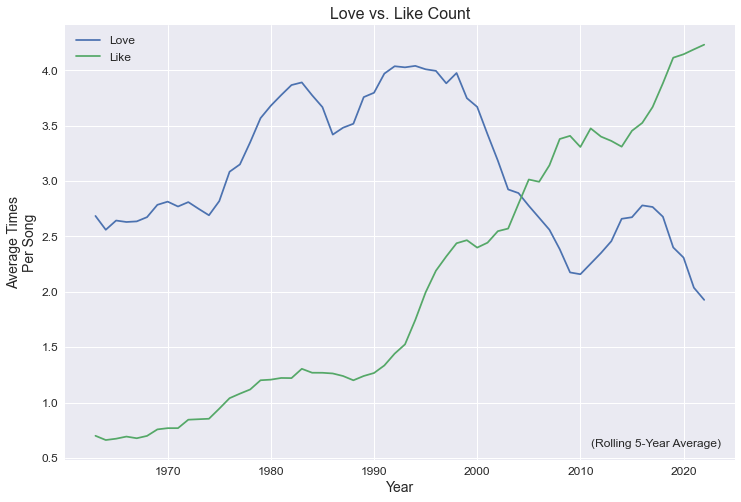

In [11]:
df2 = df[['love_count', 'like_count']].resample('Y').mean().dropna().rolling(5).mean()

plt.figure(figsize=(12,8))
sns.lineplot(data=df2, x='date', y='love_count')
sns.lineplot(data=df2, x='date', y='like_count')

plt.title('Love vs. Like Count', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Average Times\nPer Song', fontsize='14')
plt.yticks(fontsize=12)
plt.legend(['Love', 'Like'], fontsize=12)

plt.annotate('(Rolling 5-Year Average)', 
             xy=(pd.to_datetime('2011'), .6), 
             xytext=(pd.to_datetime('2011'), .6),
             fontsize=12
            )

plt.show()

In [12]:
def get_common_unique_words(text, threshold=5):
    """
    Get common unique words in dataframe, aka words that occur in multiple readme's
    a word must appear in at least threshold readmes to be considered a common word
    """
    #splitting text into individual words
    words = text.split()
    #using collections to get an ngrams count 
    counter = Counter(words)
    #Create a list with all of the unique words using our default threshold of at least 5
    common_unique_words = [
        word for word, count in counter.items() if count >= threshold
    ]
    #Join the list with a new string
    new_string = " ".join(common_unique_words)
    return new_string


def n_most_common_word(string, n=1):
    """
    Return the nth most common word in a string
    """
    # Create a list of words separated by a space
    words = string.split()
    # Make an if statement that will only show the nth most common word based on the value set for n
    if len(words) < n:
        return ""
    # Use collections to get an ngram count
    word_counts = Counter(words)
    # Return only the most common
    return word_counts.most_common(n)[n - 1][0]


# combine all strings in lyrics where decade is the same
decades = (
    df.groupby("decade")["lyrics"].apply(lambda x: " ".join(x)).reset_index()
)
decades.rename(columns={"lyrics": "all_words"}, inplace=True)
decades["unique_words"] = (
    df.groupby("decade")["unique_words"].apply(lambda x: " ".join(x)).values
)
# decades["common_unique_words"] = decades.unique_words.apply(get_common_unique_words)
decades["n_words"] = decades["all_words"].apply(lambda x: len(x.split()))
decades["unique_word_count"] = decades["all_words"].apply(
    lambda x: len(set(x.split()))
)
decades["mean_word_count"] = (
    df.groupby("decade")["word_count"].mean().values.round(1)
)
decades["median_word_count"] = (
    df.groupby("decade")["word_count"].median().values.round(1)
)
decades["most_common_word"] = decades["unique_words"].apply(
    lambda x: n_most_common_word(x)
)
decades["2nd_most_common_word"] = decades["unique_words"].apply(
    lambda x: n_most_common_word(x, 2)
)
decades["3rd_most_common_word"] = decades["unique_words"].apply(
    lambda x: n_most_common_word(x, 3)
)
decades["4th_most_common_word"] = decades["unique_words"].apply(
    lambda x: n_most_common_word(x, 4)
)
decades["5th_most_common_word"] = decades["unique_words"].apply(
    lambda x: n_most_common_word(x, 5)
)

In [13]:
df3 = decades.set_index('decade')[['most_common_word', 
                                   '2nd_most_common_word', 
                                   '3rd_most_common_word', 
                                   '4th_most_common_word', 
                                   '5th_most_common_word']]

df3 = df3.rename(columns={'most_common_word': 1,  
                           '2nd_most_common_word': 2, 
                           '3rd_most_common_word': 3, 
                           '4th_most_common_word': 4, 
                           '5th_most_common_word': 5})

df3 = df3.T

df3.index.name = 'rank'

In [14]:
df3

decade,1950,1960,1970,1980,1990,2000,2010,2020
rank,,,,,,,,
1,love,love,love,know,know,know,like,like
2,know,know,know,love,love,like,know,got
3,heart,oh,got,time,like,got,got,know
4,come,got,oh,got,want,want,get,get
5,oh,go,like,like,time,get,want,yeah


In [ ]:
pwd

In [ ]:
gdp = pd.read_csv('../gdp.csv')
for col in gdp.columns:
    gdp = gdp.rename(columns={col: col.lower()})
gdp = gdp.set_index('date')    
gdp = gdp.drop(columns=['location', 'variable', 'unit'])
gdp.index.name = 'year'

gdp['one_yr_gr'] = (gdp.value - gdp.value.shift(1)) / gdp.value.shift(1)
    
gdp['one_yr_change_in_gr'] = gdp.one_yr_gr - gdp.one_yr_gr.shift(1)

gdp['cumulative'] = gdp.one_yr_change_in_gr.cumsum()

gdp.cumulative.rolling(5).mean().plot()
plt.title('Cumulative 1_yr Change in GDP Growth Rate')
plt.show()


df[df.index >= pd.to_datetime('1970')]['sentiment'].resample('Y').mean().rolling(5).mean().plot()
plt.title('Annual Average Sentiment of Lyrics')
plt.show()

df4 = df[['sentiment']].resample('Y').mean()
df4.index.freq = None
df4.index = df4.index.astype(str)
df4.index = df4.index.str[0:4].astype(int)
df4.index.name = 'year'
df4 = df4.merge(gdp, left_index=True, right_index=True)

df4.corr()

df4[['sentiment', 'cumulative']].corr()

In [ ]:
df4 = df[['sentiment']].resample('Y').mean()
df4.index.freq = None
df4.index = df4.index.astype(str)
df4.index = df4.index.str[0:4].astype(int)
df4.index.name = 'year'
df4 = df4.merge(gdp, left_index=True, right_index=True)

df4.corr()

In [ ]:
df4[['sentiment', 'cumulative']].corr()